## Wind Speed Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nm

In [2]:
data=pd.read_csv(r"D:\Machine Learning\wind_dataset.csv")

In [3]:
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,01-01-1961,NaN,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,02-01-1961,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,03-01-1961,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,04-01-1961,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,05-01-1961,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6573 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


## Data Analysis

In [5]:
data.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6573.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796245,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977422,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [6]:
data['WIND'].value_counts()

8.38     35
9.42     32
8.50     32
7.87     31
10.88    30
         ..
22.34     1
0.58      1
0.46      1
23.67     1
24.54     1
Name: WIND, Length: 580, dtype: int64

In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'WIND'}>,
        <AxesSubplot:title={'center':'IND'}>,
        <AxesSubplot:title={'center':'RAIN'}>],
       [<AxesSubplot:title={'center':'IND.1'}>,
        <AxesSubplot:title={'center':'T.MAX'}>,
        <AxesSubplot:title={'center':'IND.2'}>],
       [<AxesSubplot:title={'center':'T.MIN'}>,
        <AxesSubplot:title={'center':'T.MIN.G'}>, <AxesSubplot:>]],
      dtype=object)

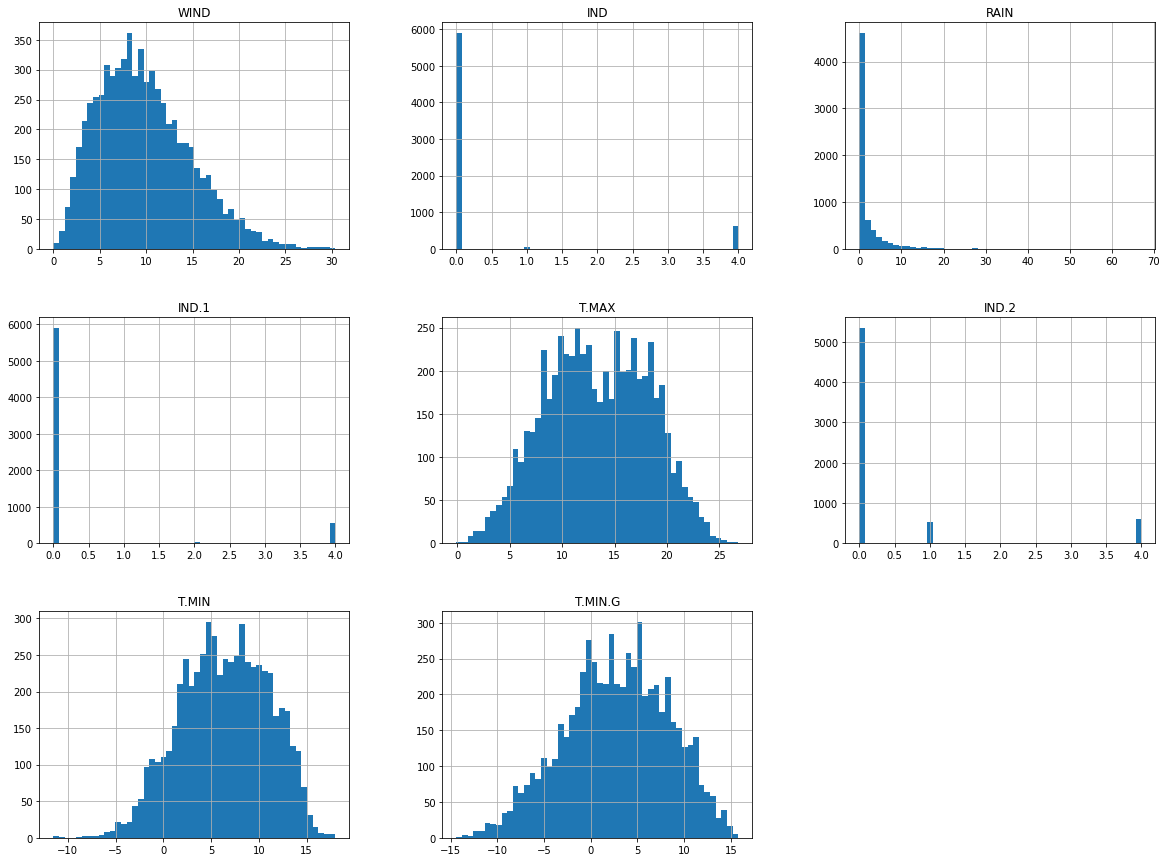

In [8]:
data.hist(bins=50,figsize=(20,15))

<AxesSubplot:>

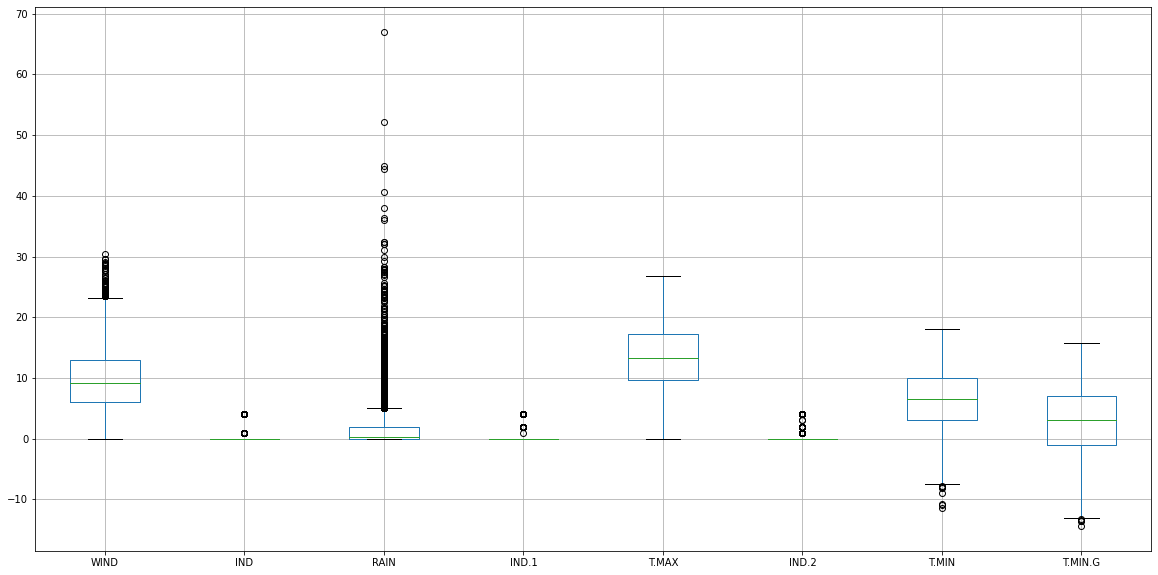

In [9]:
data.boxplot(figsize=(20,10))

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IND', ylabel='count'>

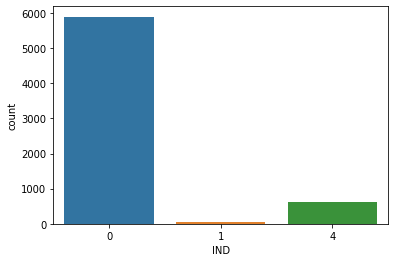

In [10]:
sns.countplot(data['IND'])

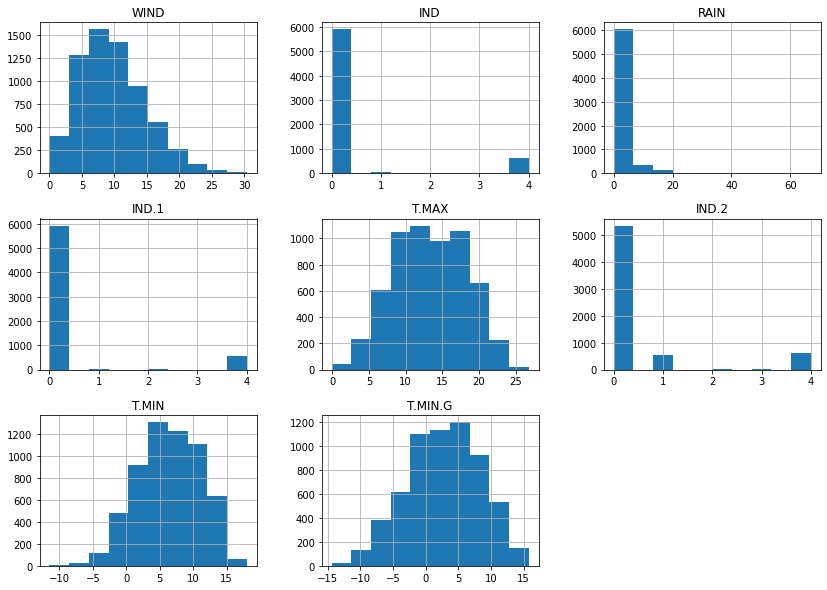

In [11]:
data.hist(figsize=(14,10))
plt.show()

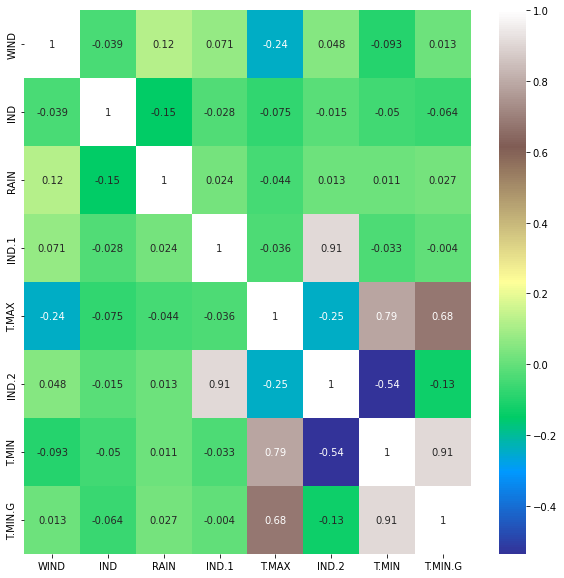

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='terrain')
plt.show()

<AxesSubplot:>

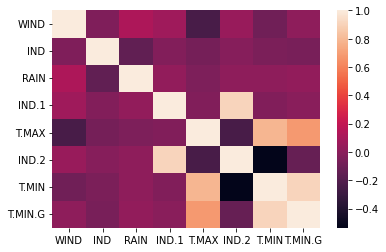

In [13]:
sns.heatmap(data.corr())

## Replacing NULL Values

In [14]:
data.isnull().sum()

DATE         0
WIND         1
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [15]:
data.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6573.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796245,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977422,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [16]:
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,01-01-1961,NaN,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,02-01-1961,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,03-01-1961,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,04-01-1961,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,05-01-1961,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [17]:
data.fillna(data.mean(),inplace = True)

C:\Users\mishr\AppData\Local\Temp\ipykernel_13292\3833177975.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(),inplace = True)


In [18]:
data

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,01-01-1961,9.796245,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,02-01-1961,11.500000,0,5.1,0.0,7.2,0.0,4.2,1.1
2,03-01-1961,11.250000,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,04-01-1961,8.630000,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,05-01-1961,11.920000,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,27-12-1978,14.460000,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,28-12-1978,14.330000,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,29-12-1978,19.170000,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,30-12-1978,18.080000,0,4.9,0.0,2.9,0.0,0.3,-0.5


## Train-Test Splitting

In [19]:
X = data[['WIND','RAIN']]
Y=data['WIND']

In [20]:
X

,WIND,RAIN
0,9.796245,0.2
1,11.500000,5.1
2,11.250000,0.4
3,8.630000,0.2
4,11.920000,10.4
...,...,...
6569,14.460000,16.8
6570,14.330000,16.0
6571,19.170000,14.7
6572,18.080000,4.9


In [21]:
Y

0        9.796245
1       11.500000
2       11.250000
3        8.630000
4       11.920000
          ...    
6569    14.460000
6570    14.330000
6571    19.170000
6572    18.080000
6573    19.250000
Name: WIND, Length: 6574, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_X, test_X , train_Y , test_Y = train_test_split(X,Y,test_size = 0.3,random_state = 123)

In [24]:
train_X

,WIND,RAIN
2864,6.38,0.0
839,21.54,1.7
784,13.75,0.0
4005,21.92,0.2
812,19.75,6.4
...,...,...
5218,5.54,2.0
4060,12.58,0.0
1346,12.33,0.0
3454,11.96,1.3


In [25]:
test_X

,WIND,RAIN
1480,20.12,2.1
4045,14.92,0.0
2155,14.79,0.1
370,8.46,2.1
4302,5.75,0.0
...,...,...
5655,7.41,0.0
2063,9.17,0.0
2323,12.67,7.2
4903,11.75,4.1


In [26]:
print('Training dataset shape:', train_X.shape, train_Y.shape)
print('Testing dataset shape:', test_X.shape, test_Y.shape)

Training dataset shape: (4601, 2) (4601,)
Testing dataset shape: (1973, 2) (1973,)


## Looking for Correlations

In [27]:
corr_matrix=data.corr()

In [28]:
corr_matrix['WIND'].sort_values(ascending=False)

WIND       1.000000
RAIN       0.120931
IND.1      0.070268
IND.2      0.047716
T.MIN.G    0.012506
IND       -0.038541
T.MIN     -0.087782
T.MAX     -0.230215
Name: WIND, dtype: float64

array([[<AxesSubplot:xlabel='WIND', ylabel='WIND'>,
        <AxesSubplot:xlabel='RAIN', ylabel='WIND'>,
        <AxesSubplot:xlabel='T.MIN.G', ylabel='WIND'>],
       [<AxesSubplot:xlabel='WIND', ylabel='RAIN'>,
        <AxesSubplot:xlabel='RAIN', ylabel='RAIN'>,
        <AxesSubplot:xlabel='T.MIN.G', ylabel='RAIN'>],
       [<AxesSubplot:xlabel='WIND', ylabel='T.MIN.G'>,
        <AxesSubplot:xlabel='RAIN', ylabel='T.MIN.G'>,
        <AxesSubplot:xlabel='T.MIN.G', ylabel='T.MIN.G'>]], dtype=object)

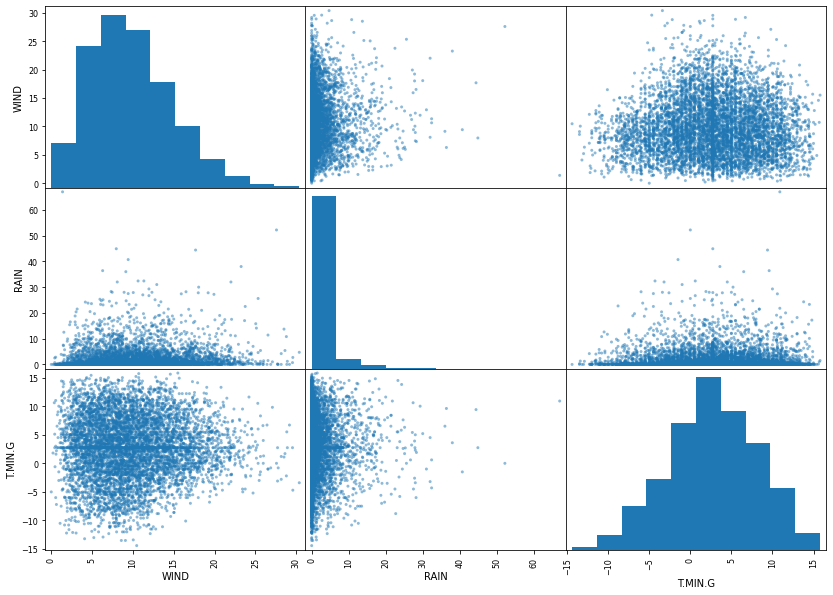

In [29]:
from pandas.plotting import scatter_matrix
attributes=["WIND","RAIN","T.MIN.G"]
scatter_matrix(data[attributes],figsize=(14,10))

## Trying out Attributes Combinations

In [30]:
data["AvgTemp"]=(data["T.MAX"]+data["T.MIN"])/2

In [31]:
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,AvgTemp
0,01-01-1961,9.796245,0,0.2,0.0,9.5,0.0,3.7,-1.0,6.60
1,02-01-1961,11.500000,0,5.1,0.0,7.2,0.0,4.2,1.1,5.70
2,03-01-1961,11.250000,0,0.4,0.0,5.5,0.0,0.5,-0.5,3.00
3,04-01-1961,8.630000,0,0.2,0.0,5.6,0.0,0.4,-3.2,3.00
4,05-01-1961,11.920000,0,10.4,0.0,7.2,1.0,-1.5,-7.5,2.85


In [32]:
corr_matrix=data.corr()
corr_matrix['WIND'].sort_values(ascending=False)

WIND       1.000000
RAIN       0.120931
IND.1      0.070268
IND.2      0.047716
T.MIN.G    0.012506
IND       -0.038541
T.MIN     -0.087782
AvgTemp   -0.170418
T.MAX     -0.230215
Name: WIND, dtype: float64

## Selecting a desired model

### Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
lr.fit(train_X,train_Y)

LinearRegression()

In [34]:
lp=lr.predict(test_X)
lp

array([20.12, 14.92, 14.79, ..., 12.67, 11.75, 15.29])

In [35]:
lr.score(test_X, test_Y)

1.0

In [36]:
print('MAE:', metrics.mean_absolute_error(test_Y, lp))
print('MSE:', metrics.mean_squared_error(test_Y, lp))
print('RMSE:', nm.sqrt(metrics.mean_squared_error(test_Y, lp)))

MAE: 5.398339881774677e-16
MSE: 8.828720566797049e-31
RMSE: 9.39612716325032e-16


### Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(train_X, train_Y)

DecisionTreeRegressor()

In [38]:
dtp=dtr.predict(test_X)
dtp

array([20.12, 14.92, 14.79, ..., 12.67, 11.75, 15.29])

In [39]:
dtr.score(test_X, test_Y)

0.9999830033268466

In [40]:
print('MAE:', metrics.mean_absolute_error(test_Y, dtp))
print('MSE:', metrics.mean_squared_error(test_Y, dtp))
print('RMSE:', nm.sqrt(metrics.mean_squared_error(test_Y, dtp)))

MAE: 0.0021338063862145974
MSE: 0.00042934617334009097
RMSE: 0.020720670195244432


### Random Forest Regressor Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(train_X, train_Y)

RandomForestRegressor(max_depth=2, random_state=0)

In [42]:
rfp=rfr.predict(test_X)
rfp

array([19.16093808, 13.04831078, 13.04831078, ..., 13.04831078,
       13.04831078, 13.04831078])

In [43]:
rfr.score(test_X, test_Y)

0.9112056580384882

In [44]:
print('MAE:', metrics.mean_absolute_error(test_Y, rfp))
print('MSE:', metrics.mean_squared_error(test_Y, rfp))
print('RMSE:', nm.sqrt(metrics.mean_squared_error(test_Y, rfp)))

MAE: 1.1980245759607302
MSE: 2.2429984145440702
RMSE: 1.4976643197138904
